In [26]:
import cartopy.crs as ccrs
import cartopy
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import ticker, colors
import shapefile
import json
import matplotlib.patheffects as PathEffects


In [4]:
import geopandas as gpd

In [5]:
with open(r'rivers.json') as f:
    coordinates = json.load(f)

In [8]:
data = gpd.read_file("/silor/boergel/paper/spatial_amo_baltic_sea/src/_ags_DrainageBasin_1/DrainageBasin_1.shp")
crs = ccrs.PlateCarree()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = data.to_crs(crs_proj4)

In [ ]:
boundaries = cartopy.feature.NaturalEarthFeature(category='cultural', facecolor='None',edgecolor='k', name='admin_0_boundary_lines_land', scale='10m')
land = cartopy.feature.NaturalEarthFeature('physical', 'land',scale='10m', edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='10m', edgecolor='none', facecolor=cfeature.COLORS['water'])
lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', scale='10m', edgecolor=cfeature.COLORS['water'], facecolor=cfeature.COLORS['water'])
rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines',
            scale='10m', edgecolor=cfeature.COLORS['water'], facecolor='none')


Text(8, 57.8, 'Skagerrak')

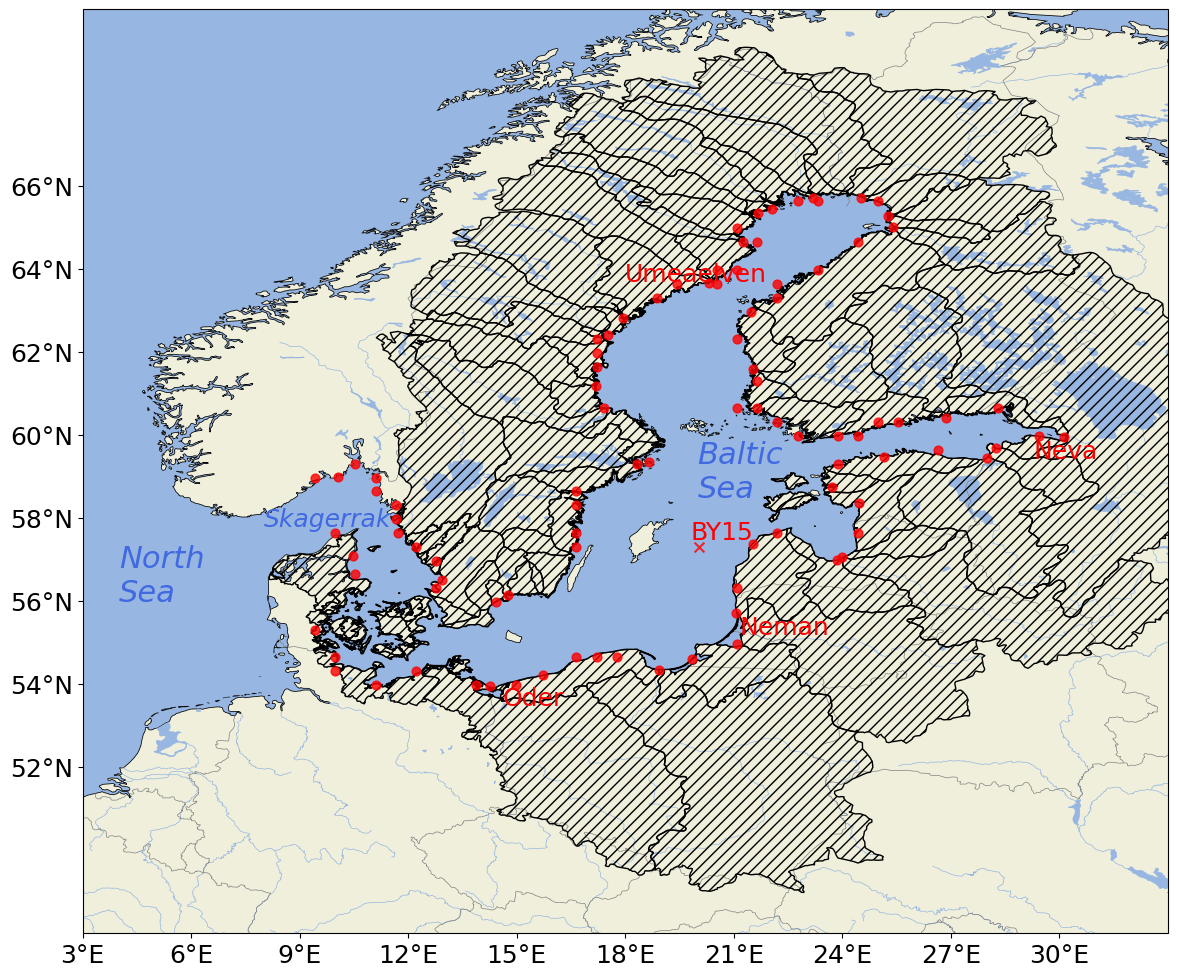

In [18]:


plt.figure(figsize=(14, 12))
ax = plt.axes(projection=cartopy.crs.PlateCarree())


ax.add_feature(land)
ax.add_feature(ocean)									
ax.add_feature(rivers, linewidth=0.5, edgecolor=cfeature.COLORS['water'])
ax.add_feature(lakes, alpha=1, linewidth=0.5)
ax.add_feature(boundaries, linewidth=0.5, edgecolor='gray')
ax.set_facecolor(cfeature.COLORS['water'])

ax.add_geometries(df_ae['geometry'], crs=crs, 
                  edgecolor='black', linewidth=1, facecolor='none', hatch='///')

ax.coastlines('10m', linewidth=0.1)
ax.set_extent([3, 35, 48, 70])
ax.set_aspect("auto")

ax.set_xticks(ticks=[3,6,9, 12, 15, 18,21, 24, 27, 30], crs=ccrs.PlateCarree())
ax.set_yticks(ticks=[52, 54, 56, 58, 60, 62, 64, 66], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda lon, _: f'{lon:.0f}°E'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda lat, _: f'{lat:.0f}°N'))
ax.tick_params(axis='both', which='major', labelsize=18) 

ax.text(29.3, 59.45, 'Neva', fontsize=18,  color='red', transform=ccrs.PlateCarree())
ax.text(14.6, 53.5, 'Oder', fontsize=18,  color='red', transform=ccrs.PlateCarree())
ax.text(21.16, 55.2, 'Neman', fontsize=18,  color='red', transform=ccrs.PlateCarree())
ax.text(18.0, 63.7, 'Umeaelven', fontsize=18,  color='red', transform=ccrs.PlateCarree())

for key, locations in coordinates.items():
    for location in locations:
        lon = location['lon']
        lat = location['lat']
        ax.scatter(lon, lat, color='red',  s=40, alpha=0.8, transform=ccrs.PlateCarree(), zorder=2)
        
ax.scatter(20.04, 57.31, color='red', marker='x', s=50, alpha=0.8, transform=ccrs.PlateCarree(), zorder=3)
ax.text(19.8, 57.5, 'BY15', fontsize=18, color='red', transform=ccrs.PlateCarree(), zorder=3)        

ax.text(4, 56, 'North\nSea', fontsize=22, fontstyle='italic', color='royalblue')
ax.text(20, 58.5, 'Baltic\nSea', fontsize=22, fontstyle='italic', color='royalblue')
ax.text(8, 57.8, 'Skagerrak', fontsize=18,fontstyle='italic', color='royalblue', transform=ccrs.PlateCarree())


#plt.savefig(r'/silod5/rummel/runoff_pred_paper/Baltic_Sea_Map', dpi=300, bbox_inches='tight')









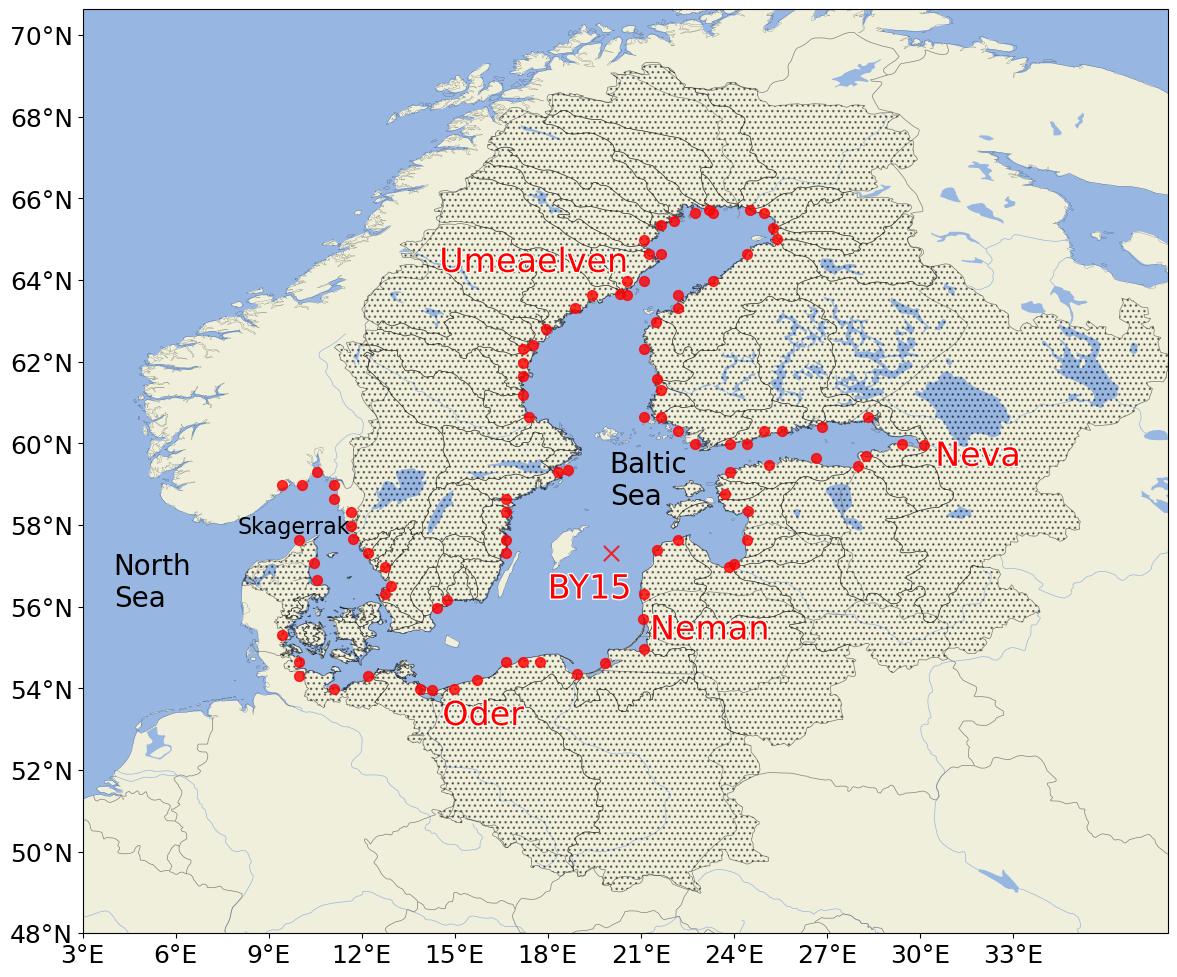

In [62]:
import matplotlib.patches as mpatches

plt.figure(figsize=(14, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)									
ax.add_feature(cfeature.RIVERS, linewidth=0.5, edgecolor=cfeature.COLORS['water'])
ax.add_feature(cfeature.LAKES, alpha=1, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
ax.set_facecolor(cfeature.COLORS['water'])

ax.add_geometries(df_ae['geometry'], crs=crs, 
                  edgecolor='black',alpha=0.5, linewidth=.5, facecolor='none', hatch='...')

ax.coastlines('10m', linewidth=0.1)
ax.set_extent([3, 38, 48, 70])
ax.set_aspect("auto")

ax.set_xticks(ticks=[3,6,9, 12, 15, 18,21, 24, 27, 30,33], crs=ccrs.PlateCarree())
ax.set_yticks(ticks=[48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,70], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda lon, _: f'{lon:.0f}°E'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda lat, _: f'{lat:.0f}°N'))
ax.tick_params(axis='both', which='major', labelsize=18) 

# Function to add text with a small shadow for contrast
def add_text_with_shadow(ax, x, y, text, fontsize=24, color='red'):
    text_obj = ax.text(x, y, text, fontsize=fontsize, color=color, transform=ccrs.PlateCarree(), zorder=4)
    text_obj.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

# Add text labels with shadow
add_text_with_shadow(ax, 30.5, 59.45, 'Neva')
add_text_with_shadow(ax, 14.6, 53.1, 'Oder')
add_text_with_shadow(ax, 21.3, 55.2, 'Neman')
add_text_with_shadow(ax, 14.5, 64.2, 'Umeaelven')

# Add scatter points with reduced size for a cleaner look
for key, locations in coordinates.items():
    for location in locations:
        lon = location['lon']
        lat = location['lat']
        ax.scatter(lon, lat, color='red', s=50, alpha=0.8, transform=ccrs.PlateCarree(), zorder=4)

ax.scatter(20.04, 57.31, color='red', marker='x', s=120, alpha=0.8, transform=ccrs.PlateCarree(), zorder=4)
add_text_with_shadow(ax, 18., 56.2, 'BY15')

# Add subtle text annotations for sea names
ax.text(4, 56, 'North\nSea', fontsize=20, color='Black')
ax.text(20, 58.5, 'Baltic\nSea', fontsize=20, color='black')
ax.text(8, 57.8, 'Skagerrak', fontsize=16, color='black')
plt.savefig(r'figures/baltic_sea_map.png', dpi=300, bbox_inches='tight')


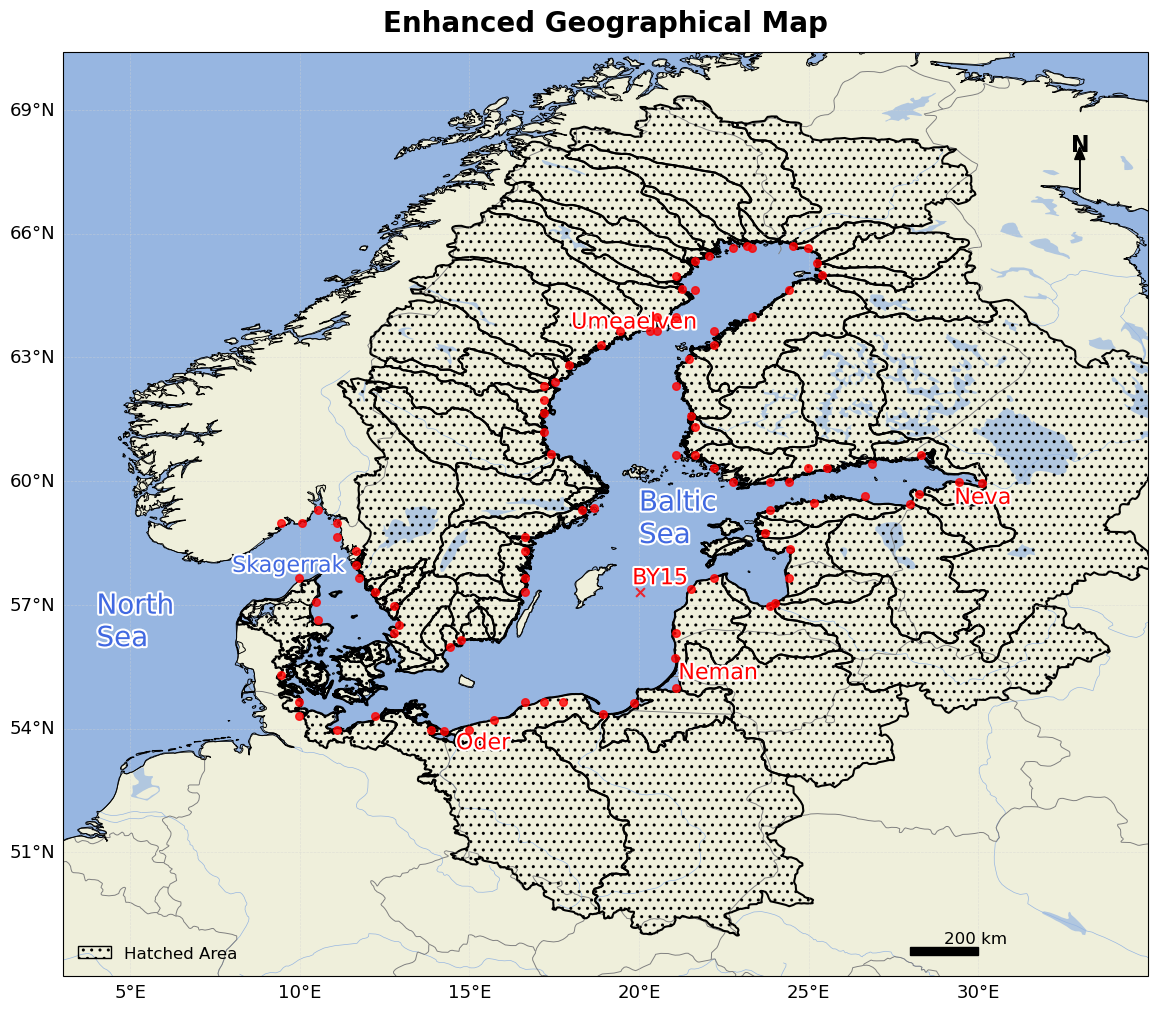

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as PathEffects

plt.figure(figsize=(14, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add land, ocean, and other features with enhanced details
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.RIVERS, linewidth=0.5, edgecolor=cfeature.COLORS['water'], zorder=1)
ax.add_feature(cfeature.LAKES, alpha=0.7, linewidth=0.5, zorder=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.7, edgecolor='gray', zorder=1)
ax.set_facecolor(cfeature.COLORS['water'])

# Add geometries with refined hatching pattern
ax.add_geometries(df_ae['geometry'], crs=crs, 
                  edgecolor='black', linewidth=1.5, facecolor='none', hatch='..', zorder=2)

# Enhance coastline visibility subtly
ax.coastlines('10m', linewidth=0.7, zorder=3)

# Set extent and aspect ratio
ax.set_extent([3, 35, 48, 70])
ax.set_aspect("auto")

# Add gridlines with refined style
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='lightgray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

# Add a simplified title

# Function to add text with a small shadow for contrast
def add_text_with_shadow(ax, x, y, text, fontsize=16, color='red'):
    text_obj = ax.text(x, y, text, fontsize=fontsize, color=color, transform=ccrs.PlateCarree(), zorder=4)
    text_obj.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])

# Add text labels with shadow
add_text_with_shadow(ax, 29.3, 59.45, 'Neva')
add_text_with_shadow(ax, 14.6, 53.5, 'Oder')
add_text_with_shadow(ax, 21.16, 55.2, 'Neman')
add_text_with_shadow(ax, 18.0, 63.7, 'Umeaelven')

# Add scatter points with reduced size for a cleaner look
for key, locations in coordinates.items():
    for location in locations:
        lon = location['lon']
        lat = location['lat']
        ax.scatter(lon, lat, color='red', s=30, alpha=0.8, transform=ccrs.PlateCarree(), zorder=4)

ax.scatter(20.04, 57.31, color='red', marker='x', s=40, alpha=0.8, transform=ccrs.PlateCarree(), zorder=4)
add_text_with_shadow(ax, 19.8, 57.5, 'BY15')

# Add subtle text annotations for sea names
add_text_with_shadow(ax, 4, 56, 'North\nSea', fontsize=20, color='royalblue')
add_text_with_shadow(ax, 20, 58.5, 'Baltic\nSea', fontsize=20, color='royalblue')
add_text_with_shadow(ax, 8, 57.8, 'Skagerrak', fontsize=16, color='royalblue')

# Add a refined scale bar with minimalistic design
scale_bar = mpatches.Rectangle((28, 48.5), 2, 0.2, transform=ccrs.PlateCarree(), color='black', zorder=4)
ax.add_patch(scale_bar)
ax.text(29, 48.8, '200 km', fontsize=12, transform=ccrs.PlateCarree(), color='black', zorder=4)

# Add a simple north arrow with minimalistic design
ax.text(33, 68, 'N', fontsize=16, ha='center', transform=ccrs.PlateCarree(), zorder=4, weight='bold')
ax.arrow(33, 67, 0, 0.8, transform=ccrs.PlateCarree(), color='black', zorder=4, head_width=0.3, head_length=0.3)

# Add a legend with simpler design
hatch_patch = mpatches.Patch(facecolor='none', edgecolor='black', hatch='..', label='Hatched Area')
plt.legend(handles=[hatch_patch], loc='lower left', fontsize=12, frameon=False)

#plt.savefig(r'/silod5/rummel/runoff_pred_paper/Baltic_Sea_Map_Improved', dpi=300, bbox_inches='tight')
plt.show()
